In [1]:
import read_data
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pandas import DataFrame

In [2]:
dataframe = read_data.create_frame()

Counter({'B.24.11': 93, 'B.27.30': 60, 'A.6': 56, 'C.24.1': 55, 'A.38': 53, 'E.17': 51, 'B.29.25': 47, 'A.36': 46, 'G.29.52': 36, 'B.29.30': 36, 'B.29.23.B.25': 35, 'E.17.3': 35, 'B.31.21': 28, 'B.24.28': 26, 'B.29.23': 25, 'G.29.30.52': 22, 'B.31.28': 21, '0': 21, 'A.37': 19, 'A.17': 18, 'B.29.23.B.30': 17, 'H.24.28': 16, 'B.29.35': 15, 'B.24.11.7': 15, 'B.24.25': 14, 'A.4': 12, 'A.1.16': 12, 'A.19': 12, 'B.24.12': 11, 'B.31.25': 11, 'B.31.11': 10, 'A.44': 10, 'B.31.28.B.32': 9, 'C.29': 8, 'B.24.28.10': 8, 'E.31.22': 8, 'B.29.30.10': 7, 'B.27.23': 7, 'G.H.29.52': 7, 'B.24.28.R': 7, 'E.17.48.3': 6, 'B.24.5': 6, 'E.17.48': 6, 'A.17.3': 6, 'B.29.35.B.25': 6, 'B.29.23.B.35': 6, 'B.31.28.30': 6, 'A.12': 6, 'A.18': 6, 'B.50.10': 6, 'B.24.28.7': 5, 'B.24.28.30': 5, 'G.29': 5, 'A.13': 5, 'E.31.28.47': 5, 'B.29.25.B.30': 5, 'B.24.10': 5, 'A.2.17': 5, 'C.24.47.1': 5, 'E.31.47': 5, 'B.27.23.B.30': 4, 'A.1': 4, 'H.31.22': 4, 'C.24': 4, 'B.31.12': 4, 'C.27': 4, 'B.31.28.B.25': 4, 'C.24.2': 4, 'B.2

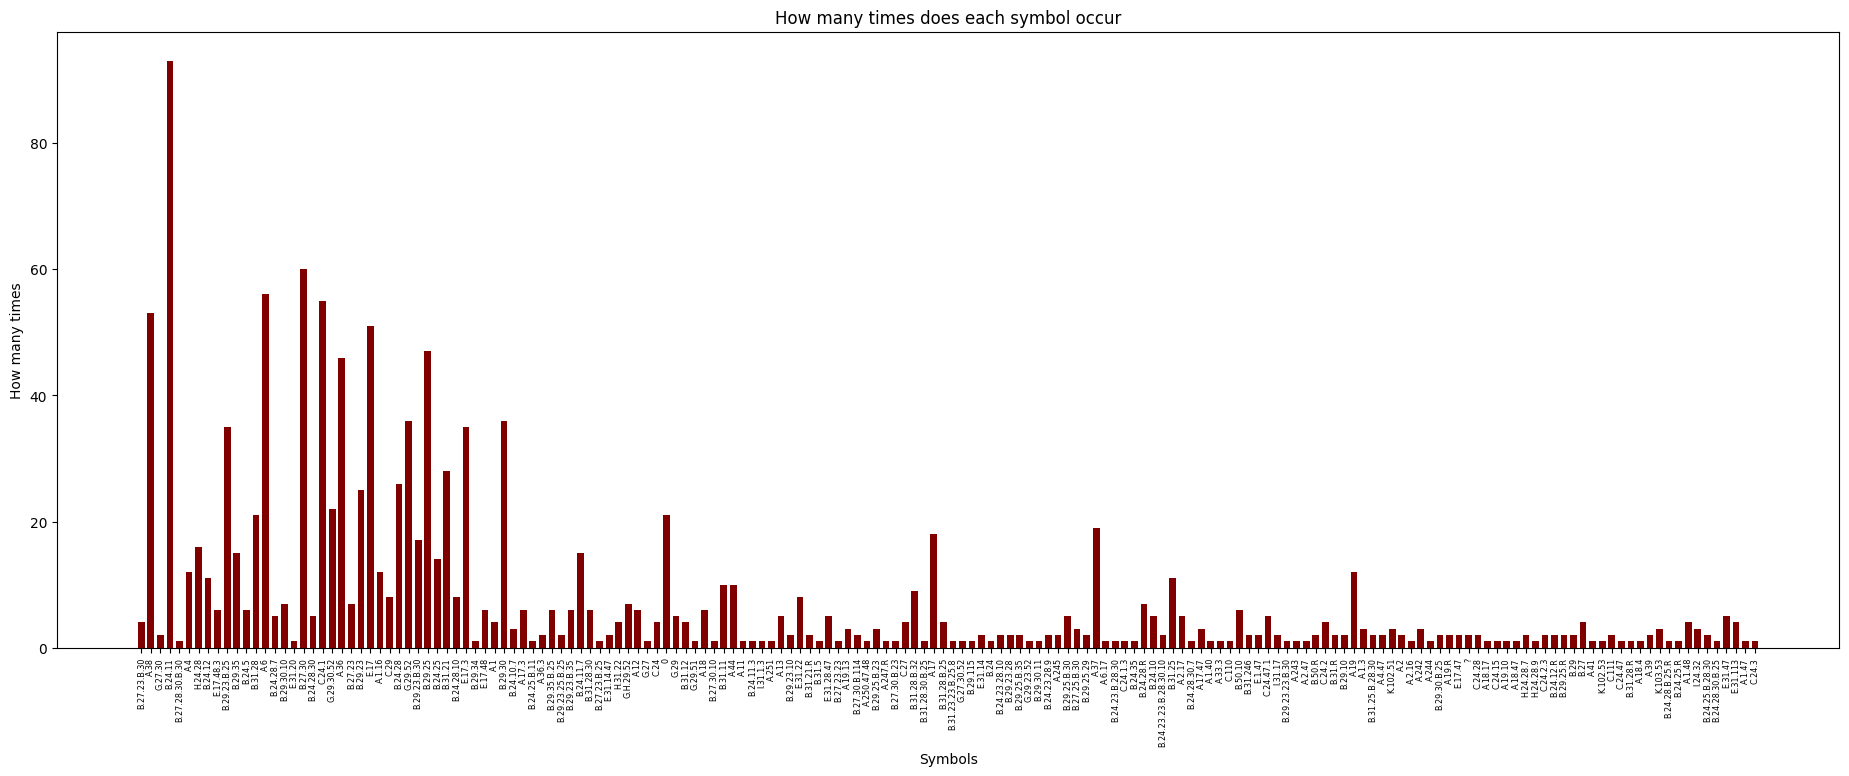

In [3]:
# count number of times each symbol appears

sequences = dataframe["sequence_values"]
symbols = []
for elem in sequences:
    symbols += elem

count = Counter(symbols)
print(count)
plt.figure(figsize=(23, 8))
plt.xticks(rotation=90, size="xx-small")
plt.bar(count.keys(), count.values(), width=0.7, color ='maroon')
plt.title("How many times does each symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(count))
# we have 170 unique symbols
plt.savefig("plots/count_symbols")


17
1 ornament 21
2 ornaments 21
3 ornaments 1
43


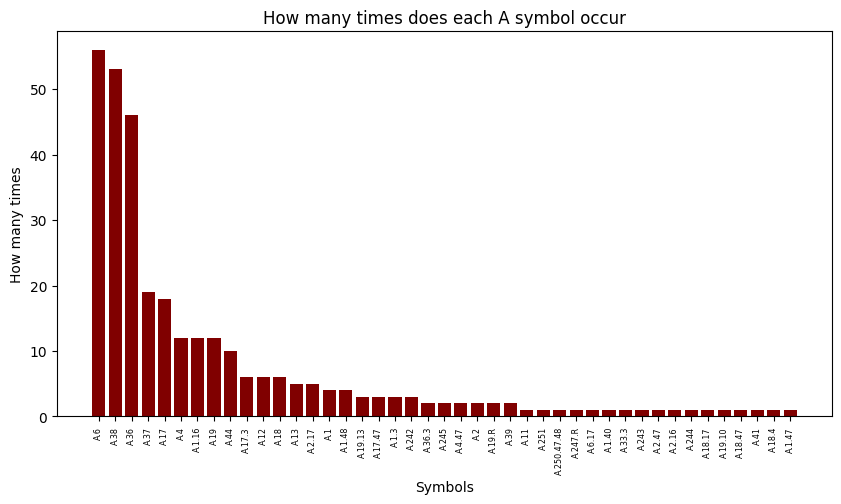

In [4]:
# Analyze signs A
dict_a = {}
count1 = 0
oz1 = 0
oz2 = 0
oz3 = 0
count_dots = 0
for key in count.keys():
     if "A" == key[0]:
          dict_a[key] = count[key]
          if count[key] == 1:
                count1+=1
          count_dots = 0
          for letter in key:
               if letter == '.':
                    count_dots += 1
          if count_dots == 1:
               oz1 += 1
          if count_dots == 2:
               oz2 += 1
          if count_dots == 3:
               oz3 += 1

print(count1)
print(f"1 ornament {oz1}")
print(f"2 ornaments {oz2}")
print(f"3 ornaments {oz3}")
sorted_dict_a = dict(sorted(dict_a.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_a.keys(), sorted_dict_a.values(), color ='maroon')
plt.title("How many times does each A symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_a.keys()))

plt.savefig("plots/count_symbols_A")

22
How many signs with two B 27
How many signs with R 9
{1: 3, 2: 26, 3: 36, 4: 12, 5: 1, 6: 1}
79


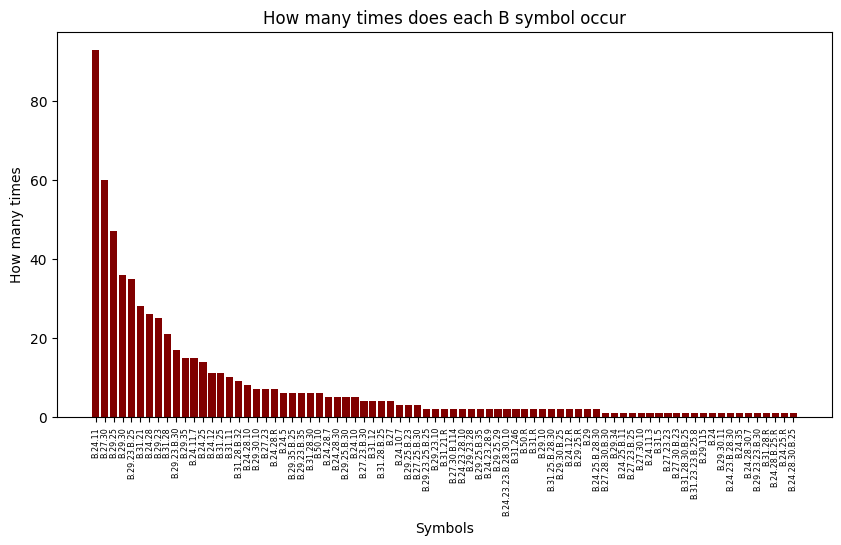

In [5]:
# Analyze signs B
dict_b = {}
dict_count_o = {}
count1 = 0
count_r = 0
count_d_b = 0
for key in count.keys():
    if "B" == key[0]:
        dict_b[key] = count[key]
        if count[key] == 1:
                count1+=1
        count_dots = 0
        for letter in key:
            if letter == "B" and count_dots != 0:
                 count_d_b += 1
                 count_dots -= 1
            if letter == '.':
                count_dots += 1
            if letter == "R":
                 count_r += 1

        if count_dots in dict_count_o.keys():
             dict_count_o[count_dots] += 1
        else:
             dict_count_o[count_dots] = 1

print(count1)
print(f"How many signs with two B {count_d_b}")
print(f"How many signs with R {count_r}")
dict_count_o = dict(sorted(dict_count_o.items(), key=lambda item: item[0]))
print(dict_count_o) #  1: 3  2: 26  3: 20 4: 19 5: 9, 3: 20, 6: 1,, 7: 1}
sorted_dict_b = dict(sorted(dict_b.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_b.keys(), sorted_dict_b.values(), color ='maroon')
plt.title("How many times does each B symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_b.keys()))

plt.savefig("plots/count_symbols_B")

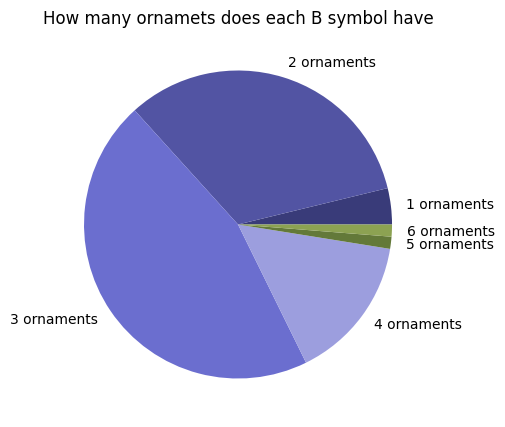

In [6]:
plt.figure(figsize=(10, 5))
labelss = [f'{key} ornaments' for key in dict_count_o.keys()]
plt.pie(dict_count_o.values(), labels=labelss, colors=plt.cm.tab20b.colors)
plt.title("How many ornamets does each B symbol have")

plt.savefig("plots/count_B_ornaments")

5
{2: 6, 1: 5, 3: 3}
{'C.24.1': 55, 'C.29': 8, 'C.24.47.1': 5, 'C.24': 4, 'C.27': 4, 'C.24.2': 4, 'C.24.28': 2, 'C.24.2.3': 2, 'C.111': 2, 'C.24.1.3': 1, 'C.110': 1, 'C.24.15': 1, 'C.24.47': 1, 'C.24.3': 1}
14


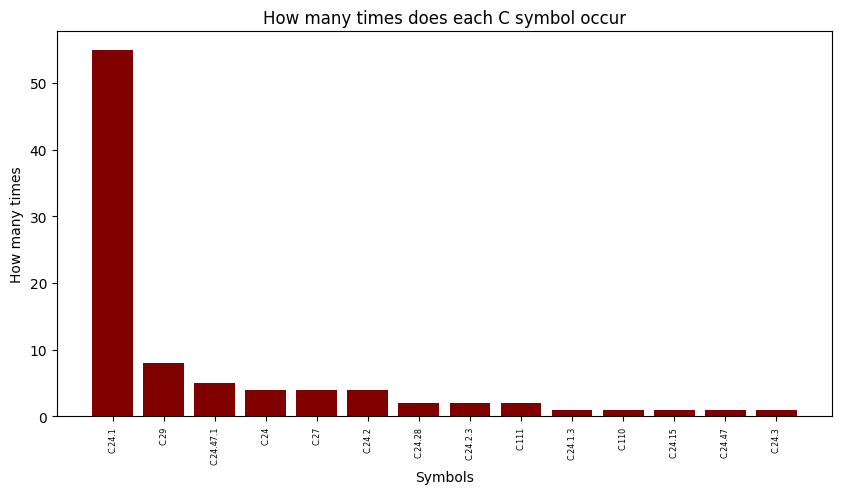

In [7]:
# Analyze signs C
dict_c = {}
dict_count_o = {}
count1 = 0

for key in count.keys():
    if "C" == key[0]:
        dict_c[key] = count[key]
        if count[key] == 1:
                count1+=1
        count_dots = 0
        for letter in key:
            if letter == '.':
                count_dots += 1

        if count_dots in dict_count_o.keys():
             dict_count_o[count_dots] += 1
        else:
             dict_count_o[count_dots] = 1

print(count1)
print(dict_count_o)
sorted_dict_c = dict(sorted(dict_c.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_c)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_c.keys(), sorted_dict_c.values(), color ='maroon')
plt.title("How many times does each C symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_c.keys()))

plt.savefig("plots/count_symbols_C")

1
{3: 3, 2: 9, 1: 1}
{'E.17': 51, 'E.17.3': 35, 'E.31.22': 8, 'E.17.48.3': 6, 'E.17.48': 6, 'E.31.28.47': 5, 'E.31.47': 5, 'E.31.113': 4, 'E.31.14.47': 2, 'E.31.14': 2, 'E.1.47': 2, 'E.17.47': 2, 'E.31.20': 1}
13


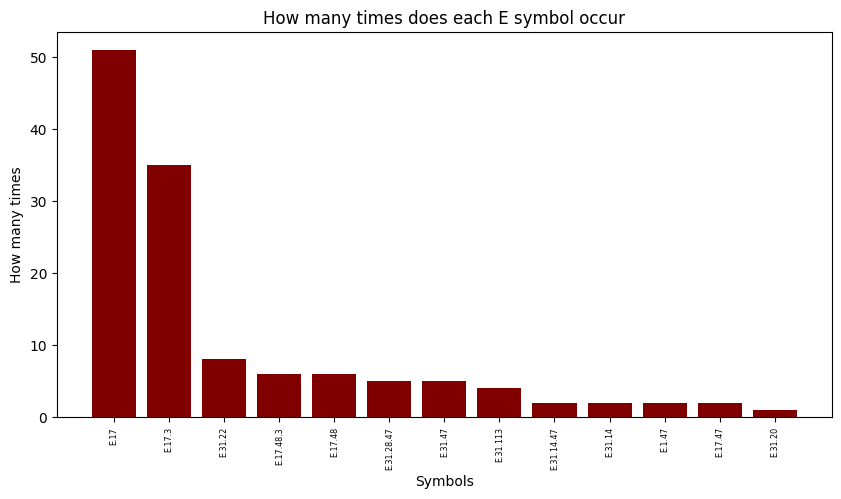

In [8]:
# Analyze signs E
dict_e = {}
dict_count_o = {}
count1 = 0

for key in count.keys():
    if "E" == key[0]:
        dict_e[key] = count[key]
        if count[key] == 1:
                count1+=1
        count_dots = 0
        for letter in key:
            if letter == '.':
                count_dots += 1

        if count_dots in dict_count_o.keys():
             dict_count_o[count_dots] += 1
        else:
             dict_count_o[count_dots] = 1

print(count1)
print(dict_count_o)
sorted_dict_e = dict(sorted(dict_e.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_e)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_e.keys(), sorted_dict_e.values(), color ='maroon')
plt.title("How many times does each E symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_e.keys()))

plt.savefig("plots/count_symbols_E")

4
{2: 3, 3: 4, 1: 2}
{'G.29.52': 36, 'G.29.30.52': 22, 'G.H.29.52': 7, 'G.29': 5, 'G.27.30': 2, 'G.27': 1, 'G.29.51': 1, 'G.27.30.52': 1, 'G.29.23.52': 1}
9


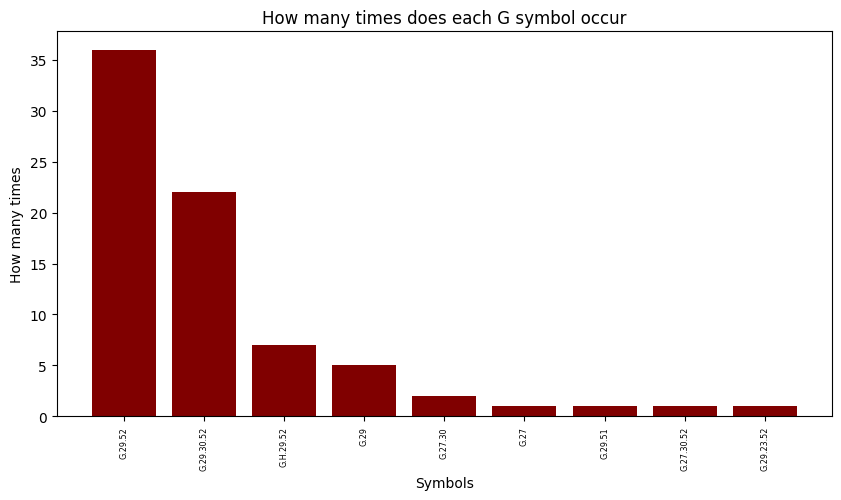

In [9]:
# Analyze signs G
dict_g = {}
dict_count_o = {}
count1 = 0

for key in count.keys():
    if "G" == key[0]:
        dict_g[key] = count[key]
        if count[key] == 1:
                count1+=1
        count_dots = 0
        for letter in key:
            if letter == '.':
                count_dots += 1

        if count_dots in dict_count_o.keys():
             dict_count_o[count_dots] += 1
        else:
             dict_count_o[count_dots] = 1

print(count1)
print(dict_count_o)
sorted_dict_g = dict(sorted(dict_g.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_g)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_g.keys(), sorted_dict_g.values(), color ='maroon')
plt.title("How many times does each G symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_g.keys()))

plt.savefig("plots/count_symbols_G")

1
{'H.24.28': 16, 'H.31.22': 4, 'H.24.28.7': 2, 'H.24.28.9': 1}
4


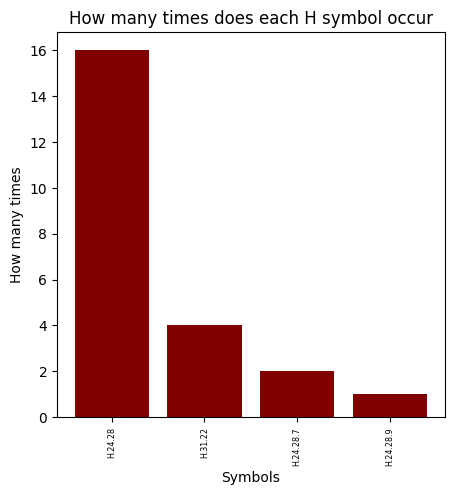

In [10]:
# Analyze signs H
dict_h = {}
count1 = 0

for key in count.keys():
    if "H" == key[0]:
        dict_h[key] = count[key]
        if count[key] == 1:
                count1+=1

print(count1)
sorted_dict_h = dict(sorted(dict_h.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_h)
plt.figure(figsize=(5, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_h.keys(), sorted_dict_h.values(), color ='maroon')
plt.title("How many times does each H symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_h.keys()))

plt.savefig("plots/count_symbols_H")

1
{'I.24.32': 3, 'I.31.17': 2, 'I.31.1.3': 1}
3


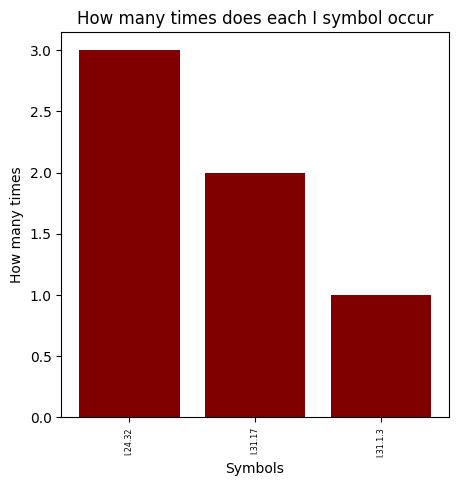

In [11]:
# Analyze signs I
dict_i = {}
count1 = 0

for key in count.keys():
    if "I" == key[0]:
        dict_i[key] = count[key]
        if count[key] == 1:
                count1+=1

print(count1)
sorted_dict_i = dict(sorted(dict_i.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_i)
plt.figure(figsize=(5, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_i.keys(), sorted_dict_i.values(), color ='maroon')
plt.title("How many times does each I symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_i.keys()))

plt.savefig("plots/count_symbols_I")

1
{'K.102.51': 3, 'K.103.53': 3, 'K.102.53': 1}
3


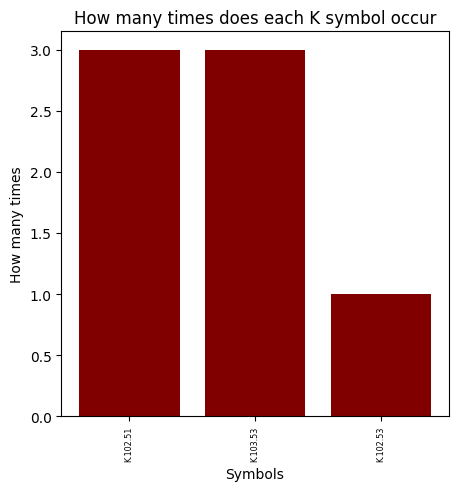

In [12]:
# Analyze signs K
dict_k = {}
count1 = 0

for key in count.keys():
    if "K" == key[0]:
        dict_k[key] = count[key]
        if count[key] == 1:
                count1+=1

print(count1)
sorted_dict_k = dict(sorted(dict_k.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_k)
plt.figure(figsize=(5, 5))
plt.xticks(rotation=90, size="xx-small")
plt.bar(sorted_dict_k.keys(), sorted_dict_k.values(), color ='maroon')
plt.title("How many times does each K symbol occur")
plt.xlabel("Symbols")
plt.ylabel("How many times")
print(len(sorted_dict_k.keys()))

plt.savefig("plots/count_symbols_K")

In [13]:
# get elements which only exist in one sequence
only_one = [elem for elem in count.keys() if count[elem] == 1]
only_one_dict = {}
data = []

for symbol in only_one:
    for i in range(len(dataframe)):
        entry = dataframe.iloc[i]
        if symbol in entry["sequence_values"]:
            only_one_dict[symbol] = entry
            data.append(entry)
            break

unique_df = DataFrame(data, columns=("object_name", "seq_name", "num_of_sequences", "sequence_len", "cycle", "sequence_values", "scenes"))

In [14]:
# investigate if there are any common factors between the sequences containing unique symbols

def check_has_scene(frame):

    counter = 0
    for i in range(len(frame)):
        entry = dataframe.iloc[i]
        if entry["scenes"] is not None:
            counter += 1

    return counter

unique_obj = unique_df.drop_duplicates('object_name')
print(f"{len(unique_df)} unique symbols appear on {len(unique_obj)} different objects out of {len(dataframe)} total.")
print(f"Of these different objects, {round(check_has_scene(unique_obj)/len(unique_obj), 3)}% contain scenes.")
temp = check_has_scene(dataframe.drop_duplicates('object_name'))/len(dataframe.drop_duplicates('object_name'))
print(f"Of all objects, {round(temp, 3)}% contain scenes.")

52 unique symbols appear on 36 different objects out of 255 total.
Of these different objects, 0.944% contain scenes.
Of all objects, 0.834% contain scenes.


In [15]:
# looking into whether "unique" scenes (contained by only 1 object) have a higher chance to contain "unique" symbols

scenes = dataframe["scenes"]
scene_individual = []
for elem in scenes:
    if elem is not None:
        scene_individual += elem

count = Counter(scene_individual)
single_count = [elem for elem in count.keys() if count[elem] <= 2]
# scenes 2, 19, 20 only appear on one scene each
# 20 - EMB-VA28404
# 19 - MUNSA-0006691
# 2 - MKSL400
temp_names = []

for i in range(len(dataframe)):
        entry = dataframe.iloc[i]
        if entry["scenes"] is not None:
          for elem in entry["scenes"]:
             if elem in single_count:
                temp_names.append(entry["object_name"])

for name in temp_names:
     if name in list(unique_df['object_name']):
          print(f"Object {name} contains a unique scene and symbol.")

# no unique symbols appear on objects with unique scenes - in each case, the scenes appear on one other object

'''
Jako że w jednym klastrze znajduje się zdecydowana większość znaków uszkodzonych (17/21).
Sugeruje to, że pradawni Inkascy wandale ze szczególną okrutnością traktowali jeden znak,
najczęściej gdy był on częścią szczególnej sekwencji.
'''
pass

Object EMB-VA8916 contains a unique scene and symbol.
Object MA7524 contains a unique scene and symbol.
Object MA7524 contains a unique scene and symbol.


In [16]:
avg_sequences_per_cup = sum(list(map(int, dataframe["num_of_sequences"])))/len(dataframe)
avg_sequences_per_cup

1.3058823529411765